In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm
import random
import seaborn as sns
# sns.set(style="darkgrid")

In [2]:
from common import get_data, get_freq_data, signal_cyclic_shift, get_ref_time, generate_multi_signal

In [3]:
# plt.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         'mathtext.fontset': 'stix',
#     }
# )

In [4]:
X_spacal, y_spacal = get_data(data_path='./data/na62_11_pulses.txt', transform=False)
X_shashlik, y_shashlik = get_data(data_path='./data/shashlik_61_pulses.txt', transform=False)

In [5]:
def normalize_data(X):
    mean_amplitude = np.mean(np.max(X, axis=1) - np.min(X, axis=1))
    X = np.array([experiment - np.max(experiment) for experiment in X])
    X = np.array([mean_amplitude * experiment/-np.min(experiment) for experiment in X])
    return X

In [6]:
X_spacal_norm = normalize_data(X_spacal)
X_shashlik_norm = normalize_data(X_shashlik)

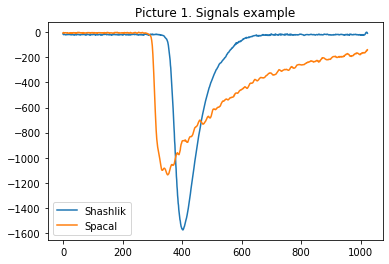

In [7]:
plt.title("Picture 1. Signals example")
plt.plot(X_shashlik_norm[0])
plt.plot(X_spacal_norm[0])
plt.legend(["Shashlik", "Spacal"])
plt.show()

In [8]:
def signal_cyclic_shift(signal, tau):
    signal_start = signal[:-tau]
    
    new_signal = np.concatenate([signal[-tau:], signal_start])
    
    return new_signal

def shift_signals(X):
    half_amplitude_time = []

    for i in tqdm.tqdm(range(len(X))):
        half_amplitude = np.max(X[i]) - (np.max(X[i]) - np.min(X[i]))/2
        cur_time = 0
        cur_amplitude = X[i][cur_time]
        while cur_amplitude > half_amplitude:
            cur_time += 1
            cur_amplitude = X[i][cur_time]
        half_amplitude_time.append(cur_time)
        
    new_pos = np.mean(half_amplitude_time)
    print("Mean half amplitude location:", new_pos)
    print("Max half amplitude location:", np.max(half_amplitude_time))
    print("Min half amplitude location:", np.min(half_amplitude_time))
    print('------------------------------------------')

    
    X_new = []
    
#     print(X.shape)
#     print(half_amplitude_time[0])
#     print(len(half_amplitude_time))
    for i in range(len(X)):
#         print(i)
        X_new.append(signal_cyclic_shift(X[i], int(new_pos - half_amplitude_time[i])))
    return np.array(X_new)

In [9]:
X_shashlik_norm_shifted = shift_signals(X_shashlik_norm)
X_spacal_norm_shifted = shift_signals(X_spacal_norm)

  0%|          | 0/1207 [00:00<?, ?it/s]

Mean half amplitude location: 356.5872833843017
Max half amplitude location: 385
Min half amplitude location: 327
------------------------------------------


100%|██████████| 1207/1207 [00:00<00:00, 7550.20it/s]

Mean half amplitude location: 297.8666114333057
Max half amplitude location: 325
Min half amplitude location: 265
------------------------------------------


In [10]:
shashlik_start = 65
shashlik_end = 30

spacal_start = 65
spacal_end = 30

100%|██████████| 1207/1207 [00:02<00:00, 496.50it/s]


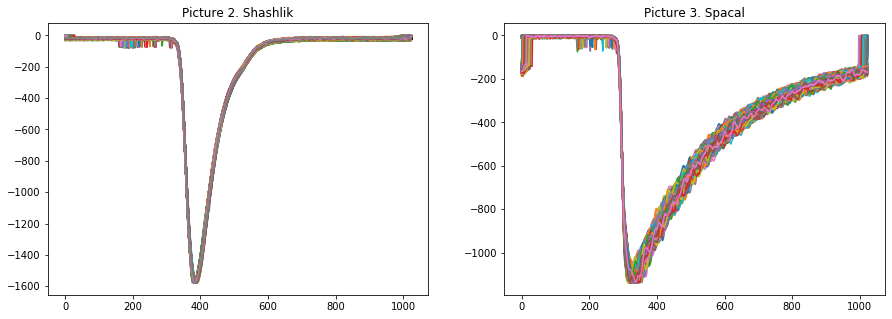

In [11]:
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].set_title("Picture 2. Shashlik")
for i in tqdm.tqdm(range(len(X_shashlik_norm_shifted))):
    axarr[0].plot(X_shashlik_norm_shifted[i])

axarr[1].set_title("Picture 3. Spacal")
for i in tqdm.tqdm(range(len(X_spacal_norm_shifted))):
    axarr[1].plot(X_spacal_norm_shifted[i])
plt.show()

In [12]:
X_shashlik_norm_shifted = X_shashlik_norm_shifted[:, shashlik_start:-shashlik_end]
X_spacal_norm_shifted = X_spacal_norm_shifted[:, spacal_start:-spacal_end]

100%|██████████| 1207/1207 [00:02<00:00, 556.93it/s]


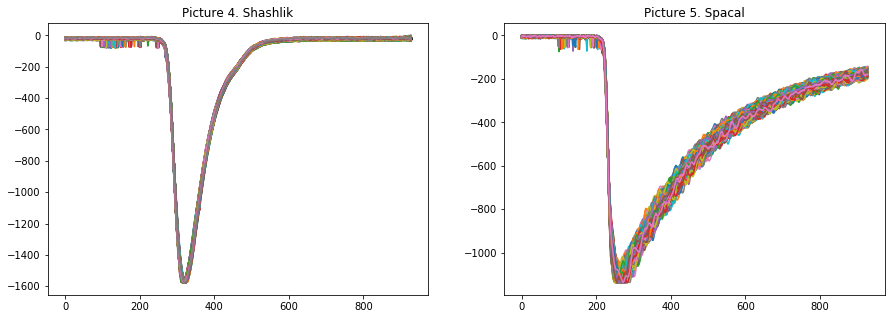

In [13]:
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].set_title("Picture 4. Shashlik")
for i in tqdm.tqdm(range(len(X_shashlik_norm_shifted))):
    axarr[0].plot(X_shashlik_norm_shifted[i])

axarr[1].set_title("Picture 5. Spacal")
for i in tqdm.tqdm(range(len(X_spacal_norm_shifted))):
    axarr[1].plot(X_spacal_norm_shifted[i])
plt.show()

In [14]:
mean_shashlik = np.mean(X_shashlik_norm_shifted, axis=0)
mean_spacal = np.mean(X_spacal_norm_shifted, axis=0)
var_shashlik = np.var(X_shashlik_norm_shifted, axis=0)
var_spacal = np.var(X_spacal_norm_shifted, axis=0)

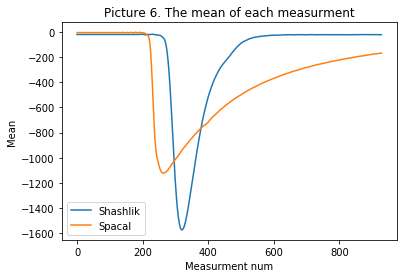

In [15]:
plt.title("Picture 6. The mean of each measurment")
plt.xlabel("Measurment num")
plt.ylabel("Mean")
plt.plot(mean_shashlik)
plt.plot(mean_spacal)
plt.legend(["Shashlik", "Spacal"])
plt.show()

In [16]:
X_shashlik_norm_shifted.shape

(7848, 929)

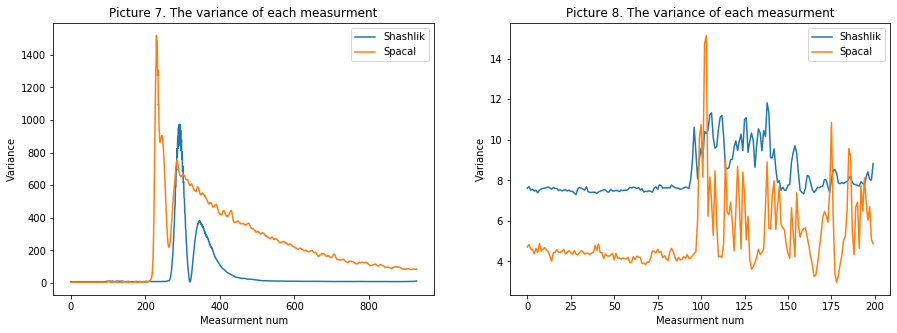

In [17]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("Picture 7. The variance of each measurment")
ax[0].plot(var_shashlik)
ax[0].plot(var_spacal)
ax[0].set_xlabel("Measurment num")
ax[0].set_ylabel("Variance")
ax[0].legend(["Shashlik", "Spacal"])


start_point = 200
ax[1].set_title("Picture 8. The variance of each measurment")
# ax[1].plot(range(start_point, len(var_shashlik)), var_shashlik[start_point:])
# ax[1].plot(range(start_point, len(var_shashlik)), var_spacal[start_point:])
ax[1].plot(range(0, start_point), var_shashlik[:start_point])
ax[1].plot(range(0, start_point), var_spacal[:start_point])
ax[1].set_xlabel("Measurment num")
ax[1].set_ylabel("Variance")
ax[1].legend(["Shashlik", "Spacal"])
plt.show()

In [23]:
X_shashlik_shifted = get_shifted_data(X_shashlik)

In [24]:
X_spacal_shifted = get_shifted_data(X_spacal)

In [25]:
X_shashlik_diff = X_shashlik - X_shashlik_shifted
X_spacal_diff = X_spacal - X_spacal_shifted

In [40]:
X_spacal.shape

(1207, 1024)

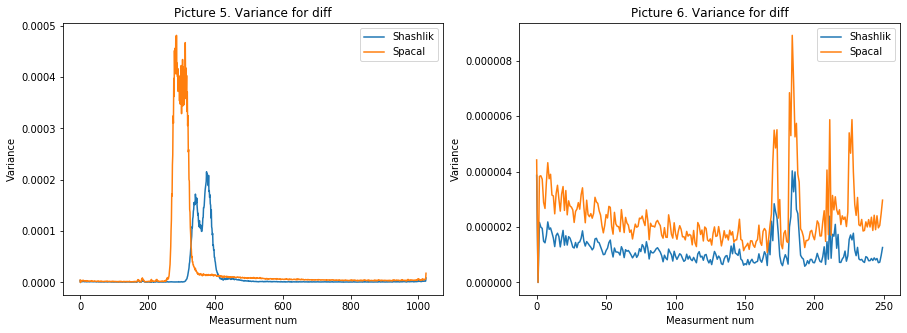

In [26]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("Picture 5. Variance for diff")
ax[0].plot(np.var(X_shashlik_diff, axis=0))
ax[0].plot(np.var(X_spacal_diff, axis=0))
ax[0].set_xlabel("Measurment num")
ax[0].set_ylabel("Variance")
ax[0].legend(["Shashlik", "Spacal"])


start_point = 250
ax[1].set_title("Picture 6. Variance for diff")
# ax[1].plot(range(start_point, len(var_shashlik)), np.var(X_shashlik_diff, axis=0)[start_point:])
# ax[1].plot(range(start_point, len(var_shashlik)), np.var(X_spacal_diff, axis=0)[start_point:])
ax[1].plot(range(0, start_point), np.var(X_shashlik_diff, axis=0)[:start_point])
ax[1].plot(range(0, start_point), np.var(X_spacal_diff, axis=0)[:start_point])
ax[1].set_xlabel("Measurment num")
ax[1].set_ylabel("Variance")
ax[1].legend(["Shashlik", "Spacal"])
plt.show()

In [ ]:
np.mean(var_spacal/var_shashlik)

In [28]:
var_spacal.shape

(1024,)

In [29]:
var_shashlik.shape

(1024,)

In [37]:
np.mean(var_spacal/var_shashlik)

543.4181704496715

In [27]:
for i in range(len(var_spacal)):
    print(var_spacal[i]/var_shashlik[i])

1.1436805285849674
1.1434086433336474
1.2615350464301278
1.0193320447793777
1.3403435574809976
0.9558613665607277
1.3795705214034095
1.0538401695642625
1.3255208134760104
1.0984271630720117
1.259982612685638
1.2432812106670013
1.0977264944360954
0.9799756393651923
1.2799261892216038
1.311211141158095
1.4960393275079922
1.4461210318653321
1.4616640859423828
1.213779112341592
1.7128637978511916
1.1890781509685098
1.3957987000293277
1.050738156126401
1.3956315850162397
1.1645011392875062
1.242209319721304
1.2466949232059197
1.1670122712910524
1.3111484315641566
1.2808821868424967
1.2198556746784892
1.3639296631597002
1.1213862754600064
1.6286668334114645
1.3459894745754335
1.3742256002137654
1.1707377720077814
1.1595496837206702
1.133911289435457
1.1878882989179553
1.10618515959016
1.273787166866934
1.1518081872103458
1.3302541744792993
1.0896017084557017
1.1078298015316044
1.0703508303203162
0.9660526844615216
1.0375035189474218
1.1882745975504811
1.1571789504230299
1.1738383606421108
0.

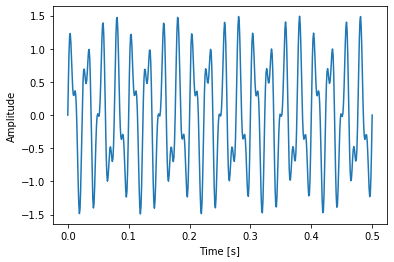

In [22]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [23]:
fft = np.fft.fft(s)


for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))


Value at index 0:	(0.0003804834928392009-0.0605550317619008j) 
Value at index 499:	(0.00038048349284042216+0.0605550317619024j)
Value at index 1:	(0.001531771483137212-0.1218880852806952j) 
Value at index 498:	(0.0015317714831376839+0.12188808528069531j)


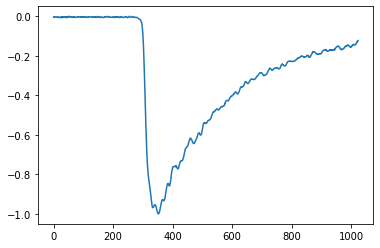

In [25]:
plt.plot(X_spacal[0])

In [30]:
t[1] - t[0]

0.001002004008016032

In [33]:
f = np.linspace(0, 1 / T, N)

In [46]:
np.abs(fft)

array([300.51985426, 151.91493522,  95.42315908, ...,  51.81393521,
        95.42315908, 151.91493522])

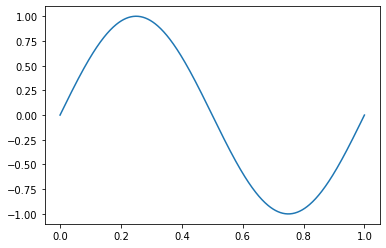

In [124]:
t = np.linspace(0, 1, 500)
s = np.sin(1 * 2 * np.pi * t)
plt.plot(t, s)

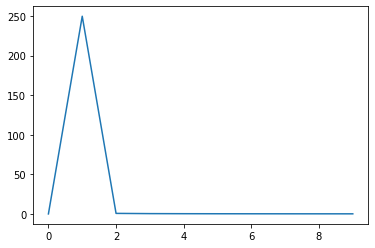

In [128]:
plt.plot(np.abs(fft[:10]))

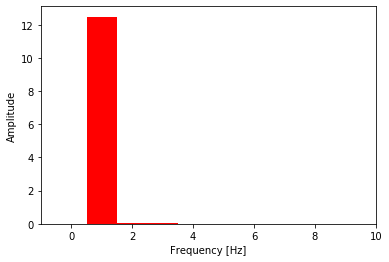

In [125]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f =  np.linspace(0, 1 / T, N) 

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:10], np.abs(fft)[:10] * 1 / 20, width=1, color='red')  # 1 / N is a normalization factor
plt.show()

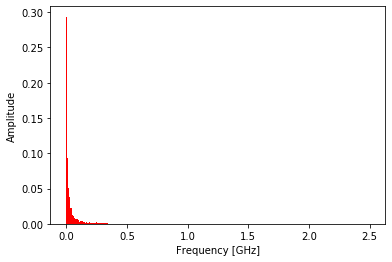

In [129]:
s = X_spacal[0]
fft = np.fft.fft(s)
T = 2e-10# sampling interval 
N = s.size

# 1/T = frequency
scale = 1e-9
f = scale*np.linspace(0, 1 / T, N)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [GHz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=0.01, color='red')  # 1 / N is a normalization factor
plt.show()

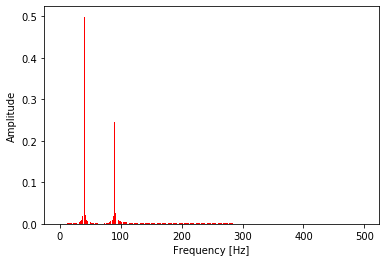

In [5]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5, color='red')  # 1 / N is a normalization factor
plt.show()